In [1]:
# NOTE: This is for when the notebook is converted to a python script
# NOTE: Must come before everything else
def get_ipython():
    return type('Dummy', (object,), dict(run_line_magic=lambda *args, **kwargs: None))

%reload_ext autoreload
%autoreload 2
from importlib import reload

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', **{'family': 'serif', 'sans-serif': ['Times'], 'size': 12})
mpl.rc('lines', solid_capstyle='round')
mpl.rc('mathtext', fontset='cm')
mpl.rc('figure', figsize=[8, 4])
plt.rc('axes', grid=True)
plt.rcParams.update({'grid.alpha': 0.25})


In [22]:
import kalepy as kale

reload(kale.kde)
reload(kale.kernels)
reload(kale.utils)
reload(kale.plot)
reload(kale)

<module 'kalepy' from '/Users/lzkelley/Programs/kalepy/kalepy/__init__.py'>

# demo

## Basic Usage

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import kalepy as kale

from kalepy.plot import nbshow

Generate some random data, and its corresponding distribution function

In [4]:
NUM = int(1e4)
np.random.seed(12345)
_d1 = np.random.normal(4.0, 1.0, NUM)
_d2 = np.random.lognormal(0, 0.5, size=NUM)
data = np.concatenate([_d1, _d2])

xx = np.linspace(0.0, 7.0, 100)[1:]
yy = 0.5*np.exp(-(xx - 4.0)**2/2) / np.sqrt(2*np.pi)
yy += 0.5 * np.exp(-np.log(xx)**2/(2*0.5**2)) / (0.5*xx*np.sqrt(2*np.pi))

### Plotting Smooth Distributions

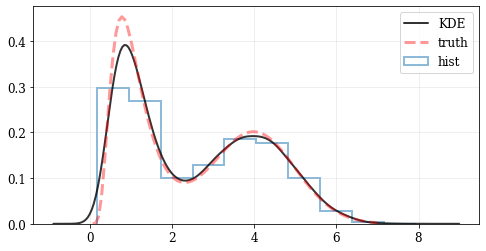

In [5]:
# Reconstruct the probability-density based on the given data points.
# If `points` aren't provided then `kalepy` automatically generates them
points, density = kale.density(data, probability=True)

# Plot the PDF
plt.plot(points, density, 'k-', lw=2.0, alpha=0.8, label='KDE')

# Plot the "true" PDF
plt.plot(xx, yy, 'r--', alpha=0.4, lw=3.0, label='truth')

# Plot the standard, histogram density estimate
plt.hist(data, density=True, histtype='step', lw=2.0, alpha=0.5, label='hist')

plt.legend()
nbshow()

### Constructing statistically similar values

Draw a new sample of data-points from the KDE PDF

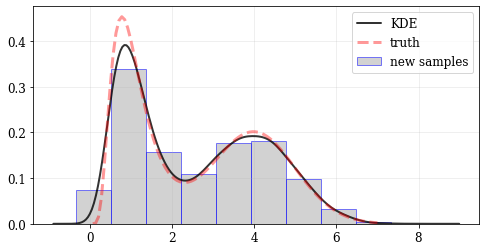

In [6]:
# Draw new samples from the KDE reconstructed PDF
samples = kale.resample(data)

# Plot new samples
plt.hist(samples, density=True, alpha=0.5, label='new samples', color='0.65', edgecolor='b')


# Plot the KDE reconstructed PDF
plt.plot(points, density, 'k-', lw=2.0, alpha=0.8, label='KDE')
# Plot the "true" PDF
plt.plot(xx, yy, 'r--', alpha=0.4, lw=3.0, label='truth')

plt.legend()
nbshow()

### Multivariate Distributions

/Users/lzkelley/Programs/kalepy/kalepy/utils.py:1082: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.random.multivariate_normal(np.zeros_like(sigma), cov, num).T


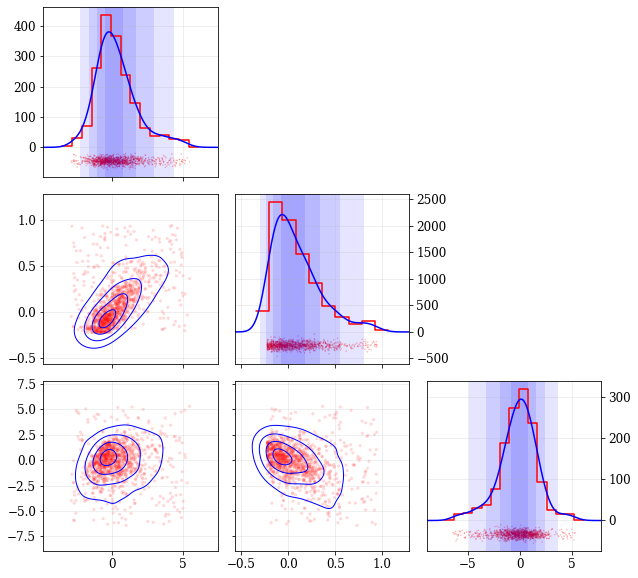

In [7]:
# Load some random-ish data
data = kale.utils._random_data_3d_01()

# Construct a KDE
kde = kale.KDE(data)

import kalepy.plot

# Build a corner plot using the `kalepy` plotting submodule
corner = kale.plot.Corner(kde, figsize=[10, 10])

# Data points: red scatter and histograms
corner.plot_data(color='red', scatter=dict(s=10, alpha=0.15))

# KDE reconstructed density-distribution: blue contours and curves
corner.plot_kde(color='blue')


plt.show()

## Fancy Usage

### Reflecting Boundaries

What if the distributions you're trying to capture have edges in them, like in a uniform distribution between two bounds?  Here, the KDE chooses 'reflection' locations based on the extrema of the given data.

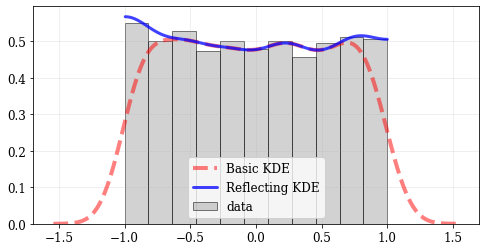

In [47]:
# Uniform data (edges at -1 and +1)
np.random.seed(54321)
data = np.random.uniform(-1.0, 1.0, int(1e3))

# Histogram the data, use fixed bin-positions
edges = np.linspace(-1, 1, 12)
plt.hist(data, bins=edges, density=True, alpha=0.5, label='data', color='0.65', edgecolor='k')

# Standard KDE will undershoot just-inside the edges and overshoot outside edges
points, pdf_basic = kale.density(data, probability=True)
plt.plot(points, pdf_basic, 'r--', lw=4.0, alpha=0.5, label='Basic KDE')

# Reflecting KDE keeps probability within given bounds
points, pdf_basic = kale.density(data, reflect=True, probability=True)
plt.plot(points, pdf_basic, 'b-', lw=3.0, alpha=0.75, label='Reflecting KDE')

plt.legend()
nbshow()

Explicit reflection locations can also be provided (in any number of dimensions).

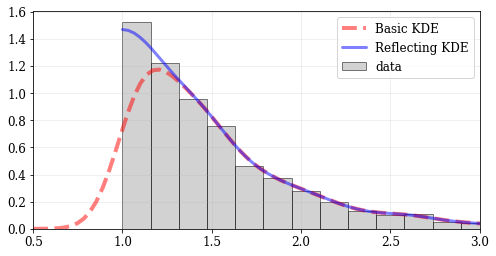

In [48]:
# Construct random data, add an artificial 'edge'
np.random.seed(5142)
edge = 1.0
data = np.random.lognormal(sigma=0.5, size=int(3e3))
data = data[data >= edge]

# Histogram the data, use fixed bin-positions
edges = np.linspace(edge, 4, 20)
plt.hist(data, bins=edges, density=True, alpha=0.5, label='data', color='0.65', edgecolor='k')

# Standard KDE with over & under estimates
points, pdf_basic = kale.density(data, probability=True)
plt.plot(points, pdf_basic, 'r--', lw=4.0, alpha=0.5, label='Basic KDE')

# Reflecting KDE setting the lower-boundary to the known value
#    There is no upper-boundary when `None` is given.
points, pdf_basic = kale.density(data, reflect=[edge, None], probability=True)
plt.plot(points, pdf_basic, 'b-', lw=3.0, alpha=0.5, label='Reflecting KDE')

plt.gca().set_xlim(edge - 0.5, 3)
plt.legend()
nbshow()

### Multivariate Reflection

### Selecting Particular Parameters/Dimensions

### Resampling while 'keeping' certain parameters/dimensions

### Cumulative distribution and quartiles (percent-point functions)